## 5.2.2 训练算法：使用梯度上升找到最佳参数

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
def loadDataSet():
    dataMat=[]
    labelMat=[]
    with open('testSet.txt') as fr:
        for line in fr.readlines():
            lineArr=line.strip().split()
            dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])
            labelMat.append(int(lineArr[2]))
                         
    return dataMat,labelMat

def sigmoid(inX):
     return 1.0/(1+np.exp(-inX))

def gradAscent_Batch(dataMatIn,classLabels,epoch=500,plot=False):##全量梯度上升
    dataMatrix=np.mat(dataMatIn)
    labelMat=np.mat(classLabels).transpose()
    n,m=dataMatrix.shape
    alpha=0.001
    weights=np.ones((m,1))
    if plot:
        weight_record = [[] for row in range(m)]
    for i in range(epoch):
        h=sigmoid(dataMatrix*weights)
        error=(labelMat-h)
        weights=weights+alpha*dataMatrix.transpose()*error
        if plot:
            for k in range(m):
                weight_record[k].append(weights.A1[k])

    if (plot):
        fig=plt.figure()
        ax=fig.add_subplot(1,1,1)
        t1=range(0,epoch)
        for i in range(m):
            ax.plot(t1,weight_record[i],label='w%d'%i)
        plt.legend(loc='best')
        plt.show()
    
    return weights

def gradAscent_Stochastic(dataMatIn,classLabels,epoch=150,plot=False):##随机梯度上升
    dataMatrix=np.mat(dataMatIn)
    labelMat=np.mat(classLabels).transpose()
    n,m=dataMatrix.shape
    weights=np.ones((m,1))
    if plot:
        weight_record = [[] for row in range(m)]
    for i in range(epoch):
        for j in range(n):
            alpha=4/(1.0+j+i)+0.001
            randIndex = int(np.random.uniform(0,n))
            h=sigmoid(dataMatrix[randIndex]*weights)
            error=labelMat[randIndex]-h
            weights=weights+alpha*dataMatrix[randIndex].transpose()*error
            if plot:
                for k in range(m):
                    weight_record[k].append(weights.A1[k])
    
    if (plot):
        fig=plt.figure()
        ax=fig.add_subplot(1,1,1)
        t1=range(0,epoch*n)
        for i in range(m):
            ax.plot(t1,weight_record[i],label='w%d'%i)
        plt.legend(loc='best')
        plt.show()
    
    return weights

def gradAscent_MiniBatch(dataMatIn,classLabels,epoch=500,batch_size=100,plot=False):##小批量随机梯度上升
    dataMatrix=np.mat(dataMatIn)
    labelMat=np.mat(classLabels).transpose()
    n,m=dataMatrix.shape
    alpha=0.001
    weights=np.ones((m,1))
    if plot:
        weight_record = [[] for row in range(m)]
    for i in range(epoch):
        randIndex=random.sample(range(n), batch_size)
        h=sigmoid(dataMatrix[randIndex]*weights)
        error=(labelMat[randIndex]-h)
        weights=weights+alpha*dataMatrix[randIndex].transpose()*error
        if plot:
            for k in range(m):
                weight_record[k].append(weights.A1[k])
    
    if (plot):
        fig=plt.figure()
        ax=fig.add_subplot(1,1,1)
        t1=range(0,epoch)
        for i in range(m):
            ax.plot(t1,weight_record[i],label='w%d'%i)
        plt.legend(loc='best')
        plt.show()
    return weights

In [2]:
dataArr,labelMat=loadDataSet()

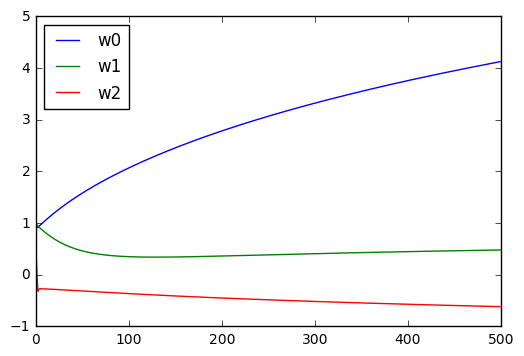

In [3]:
weights=gradAscent_Batch(dataArr,labelMat,500,plot=True)
# weights

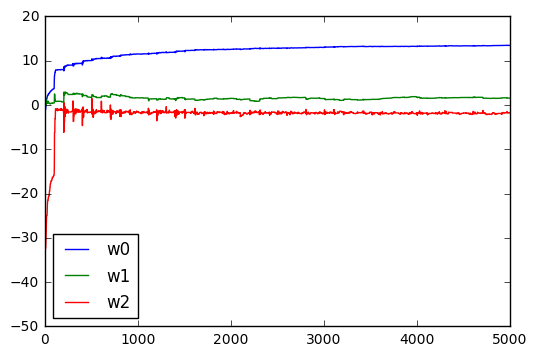

matrix([[ 13.46321454],
        [  1.55425045],
        [ -1.78784005]])

In [4]:
weights=gradAscent_Stochastic(dataArr,labelMat,50,plot=True)
weights

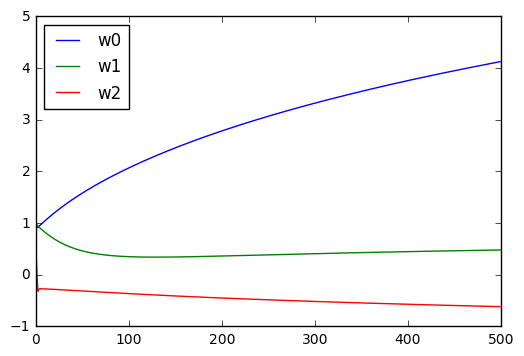

In [5]:
weights=gradAscent_MiniBatch(dataArr,labelMat,500,plot=True)

## 5.2.3 分析数据：画出决策边界

In [6]:
import matplotlib.pyplot as plt
def plotBestFit(weights):
    dataMat,labelMat=loadDataSet()
    dataArr=np.array(dataMat)
    n=dataArr.shape[0]
    xcord1=[]
    ycord1=[]
    xcord2=[]
    ycord2=[]
    for i in range(n):
        if (int(labelMat[i])==1):
            xcord1.append(dataArr[i][1])
            ycord1.append(dataArr[i][2])
        else:
            xcord2.append(dataArr[i][1])
            ycord2.append(dataArr[i][2])
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.scatter(xcord1,ycord1,s=30,c='red',marker='s')
    ax.scatter(xcord2,ycord2,s=30,c='green')
    x=np.arange(-3.0,3.0,0.1)
    y=(-weights.A1[0]-weights.A1[1]*x)/weights.A1[2] ## x.A1:Return `self` as a flattened `ndarray`.
# >>> x = np.matrix(np.arange(12).reshape((3,4))); 
# >>> x
#         matrix([[ 0,  1,  2,  3],
#                 [ 4,  5,  6,  7],
#                 [ 8,  9, 10, 11]])
#>>> x.getA1()
#         array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
    ax.plot(x,y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

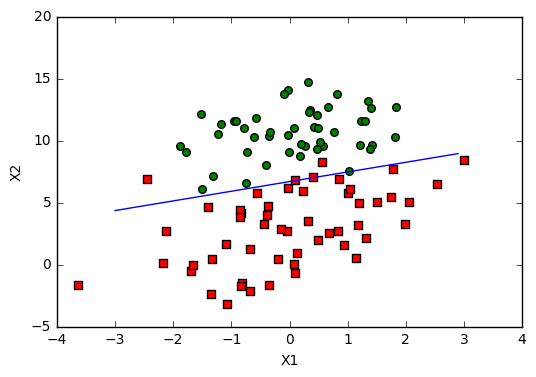

In [7]:
plotBestFit(weights)

# 5.3 示例：从疝气病症预测病马的死亡率

## 5.3.2 测试算法：用Logistic回归进行分类

In [8]:
def classifyVector(matX,weights):
    prob=sigmoid(sum(matX*weights))
    return 1 if prob>0.5 else 0

def colicTest():
    with open('horseColicTraining.txt') as frTrain:
        trainingSet = []; trainingLabels = []
        for line in frTrain.readlines():
            currLine = line.strip().split('\t')
            lineArr =[]
            for i in range(len(currLine)):
                lineArr.append(float(currLine[i]))
            trainingSet.append(lineArr)
            trainingLabels.append(float(currLine[21]))
            
    trainWeights = gradAscent_Stochastic(trainingSet, trainingLabels, 50)
    
    errorCount = 0
    numTestVec = 0.0
    
    with open('horseColicTest.txt') as frTest:
        for line in frTest.readlines():
            numTestVec += 1.0
            currLine = line.strip().split('\t')
            lineArr =[]
            for i in range(len(currLine)):
                lineArr.append(float(currLine[i]))
            if int(classifyVector(np.array(lineArr), trainWeights))!= int(currLine[21]):
                errorCount += 1
                
    errorRate = (1.0*errorCount/numTestVec)
    print "the error rate of this test is: %f" % errorRate
    return errorRate

def multiTest():
    numTests = 10; errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest()
    print "after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests))
        

In [9]:
multiTest()

/usr/local/Cellar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: overflow encountered in exp


the error rate of this test is: 0.179104
the error rate of this test is: 0.313433
the error rate of this test is: 0.268657
the error rate of this test is: 0.119403
the error rate of this test is: 0.164179
the error rate of this test is: 0.313433
the error rate of this test is: 0.268657
the error rate of this test is: 0.164179
the error rate of this test is: 0.179104
the error rate of this test is: 0.223881
after 10 iterations the average error rate is: 0.219403
